# Matemáticas para la Ciencia de Datos
## Proyecto Final
### Cálculo de la prima de riesgo del seguro de gastos médicos para la enfermedad causada por el virus SARS-CoV2
### Facilitador: Dr. Juliho Castillo Colmenares

#### Alumnos

##### Nayeli Galván Palmerín
##### Aldo Raziel Hernández Alvarez

<div style="text-align: right"> Fecha de entrega: 13-06-2021 </div>

---

- **Resumen**

Debido a los eventos presentados durante 2020, las instituciones aseguradoras del país enfrentaron grandes gastos de siniestros por la pandemia, en particular, los seguros de gastos médicos tuvieron gastos imprevistos que impactaron en sus reservas.

La forma más común de calcular la prima de riesgo de un seguro es toma el valor esperado de un siniestro, esto es, tomar el número de siniestros que han ocurrido de un evento en específico y multiplicarlo por el monto promedio de estos siniestros; sin embargo, se requiere de una estadística suficiente para poder llevar a cabo este análisis que, debido a la naturaleza de una pandemia, no se contaba con ella antes de 2020.

La Comisión Nacional de Seguros y Fianzas (CNSF) es el órgano regulador de las instituciones aseguradoras y afianzadoras del país y ante la cual, deben reportar la información estadística de los seguros vendidos, reclamaciones, siniestros, etc. Con los datos reportados sobre los siniestros por el virus del SARS-CoV2 es posible modelar más datos a partir de un modelo de crecimiento polinomial, con lo cual se podrá estimar una prima de riesgo más precisa para una enfermedad viral de magnitud pandémica.

- **Introducción**

Tras la declaratoria de pandemia por el coronavirus SARS-CoV-2 por parte de la Organización Mundial de la Salud (OMS) los gobiernos al rededor del mundo se han visto en la necesidad de instaurar medidas para la contención del COVID-19, enfermedad causada por el SARS-CoV-2, dichas medidas evitan la propagación del virus en la población, salvaguardando vidas, pero que han afectado la economía mundial.

El sector asegurador no ha sido exento de los impactos generados por la pandemia, debido al posible aumento en siniestralidad en operaciones como gastos médicos y vida; así como impactos en la operación, infraestructura y portafolios de inversión de las instituciones de seguros.

No todo el panorama es totalmente obscuro, ya que a la par se ha presentado un incremento en la adquisición de seguros de gastos médicos y vida.

Por lo anterior es de nuestro interés realizar una medición del impacto del COVID-19 en los seguros de gastos médicos, dicha medición a través del modelado de su siniestralidad, con información presentada por las instituciones de seguros a la Comisión Nacional de Seguros y Fianzas y así obtener una prima de riesgo (valor esperado de siniestros).

Con lo anterior conoceremos el impacto que tuvo el COVID-19 en cuestión de siniestros cobrados para el seguro de gastos médicos y tendremos la prima de riesgo que se debió cobrar por género, entidad de residencia y edad de los asegurados.

- **Planteamiento del problema**

El cálculo de primas de las aseguradoras se basa en la experiencia de eventos ocurridos a lo largo del tiempo, debido a que los casos de pandemias en la historia de la humanidad se han presentado en contextos históricos muy diferentes, no se cuenta con una estadística que se apegué a la realidad actual y que nos ayude a obtener un modelo que ofrezca una predicción o una aproximación a los fenómenos de tipo pandémico futuros, por tal motivo, se busca una manera de simular eventos futuros que sean de utilidad a las instituciones para calcular el impacto de eventos catastróficos, como lo es una pandemia causada por un virus.

A través de medios de comunicación se dio a conocer que las compañías con mayor emisión de prima ofrecían cobertura para padecimientos y fallecimientos causados por el COVID-19 en sus seguros de gastos médicos y vida, a través de esta investigación y análisis de información se verá reflejado que acciones tomaron las compañías para hacer frente a los siniestros.

- **Marco teórico**

En el campo de seguros, es usual que el cálculo de primas para un seguro de gastos médicos se lleve a cabo mediante el número de eventos pasados y la severidad de éstos, sin embargo, para el caso en que no se cuenta con la suficiente información no es posible hacer un cálculo preciso de esto, por este motivo, se emplearán modelos polinomiales para crear una mejor estadística y tener un cálculo más preciso de la prima.

- **Objetivo**

Cálculo de prima de riesgo (siniestralidad esperada) a corto plazo para conocer el capital requerido por las instituciones de seguro para hacer frente a un evento pandémico, en específico el presentado en el año 2020.

- **Metodología**

La información estadística con la que se cuenta en estos momentos es relativamente pequeña para calcular de manera efectiva la prima de riesgo del COVID-19, pero con estos datos y diversos modelos matemáticos, se puede modelar un comportamiento a futuro de los siniestros que pueden ocurrir y con esto calcular la prima de riesgo de un seguro que cubra el este tipo de eventos. Se empleará un modelo con crecimiento polinomial para obtener una solución al problema planteado.

- **Desarrollo**

A continuación, se muestra el código para solucionar el ejercicio en cuestión:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.polynomial.polynomial as poly
import seaborn as sns

La información proporcionada por la CNSF tiene un detalle de aquellas instituciones que en 2020 reportaron haber pagado algún tipo de siniestro de gastos médicos por causa del virus SARS-CoV2, así como la entidad donde ocurrió el siniestro y el número de seguros que estas instituciones reportaron tener en vigor al final de 2020. 

De esta información, se agrupó por edad y sexo, de tal manera que para el ejercicio se utiliza la información por número de siniestros reportados, el monto promedio pagado por edad de un siniestro, el número de seguros en vigor por edad y toda esta información separada por sexo Femenino o Masculino.

Asimismo, para poder calcular la prima de riesgo a corto plazo de un seguro de gastos médicos, se multiplica la frecuencia de los siniestros por la severidad de éstos, teniendo que:

$$prima.riesgo_{i,j} = frecuencia_{i,j}*severidad_{i,j}$$

$$frecuencia_{i,j}=\frac{núm.siniestros_{i,j}}{núm.asegurados_{i,j}}$$

$$severidad_{i,j} = \frac{monto.siniestros_{i,j}}{núm.siniestros_{i,j}}$$

Donde:

i= el género de los asegurados= [Femenino, Masculino]

j= la edad de los asegurados= [25,...,77]

A continuación, se muestra parte de los datos empleados para el problema planteado y el cálculo de la frecuencia de los datos.

In [2]:
# carga de datos
datos = pd.read_csv('datos_covid.csv')
datos["FRECUENCIA_F"] = datos["SINIESTROS_F"] / datos["SEGUROS_F"]
datos["FRECUENCIA_M"] = datos["SINIESTROS_M"] / datos["SEGUROS_M"]
print(datos.head())

   EDAD  SINIESTROS_F   MONTO_SIN_F  SEGUROS_F  SINIESTROS_M   MONTO_SIN_M  \
0    25            75   36840.53707      53599           164  134225.24600   
1    26           101   34851.27861      56139           158   91271.32937   
2    27           124   41548.13153      59141           251   70331.77629   
3    28           167  160542.55160      63784           303   59994.76426   
4    29           142   31023.13824      66786           254   66739.40957   

   SEGUROS_M  FRECUENCIA_F  FRECUENCIA_M  
0      76119      0.001399      0.002155  
1      76798      0.001799      0.002057  
2      78536      0.002097      0.003196  
3      83620      0.002618      0.003624  
4      85022      0.002126      0.002987  


Se grafican los datos originales para observar si tienen una tendencia en particular u otorgan alguna información

<function matplotlib.pyplot.show(close=None, block=None)>

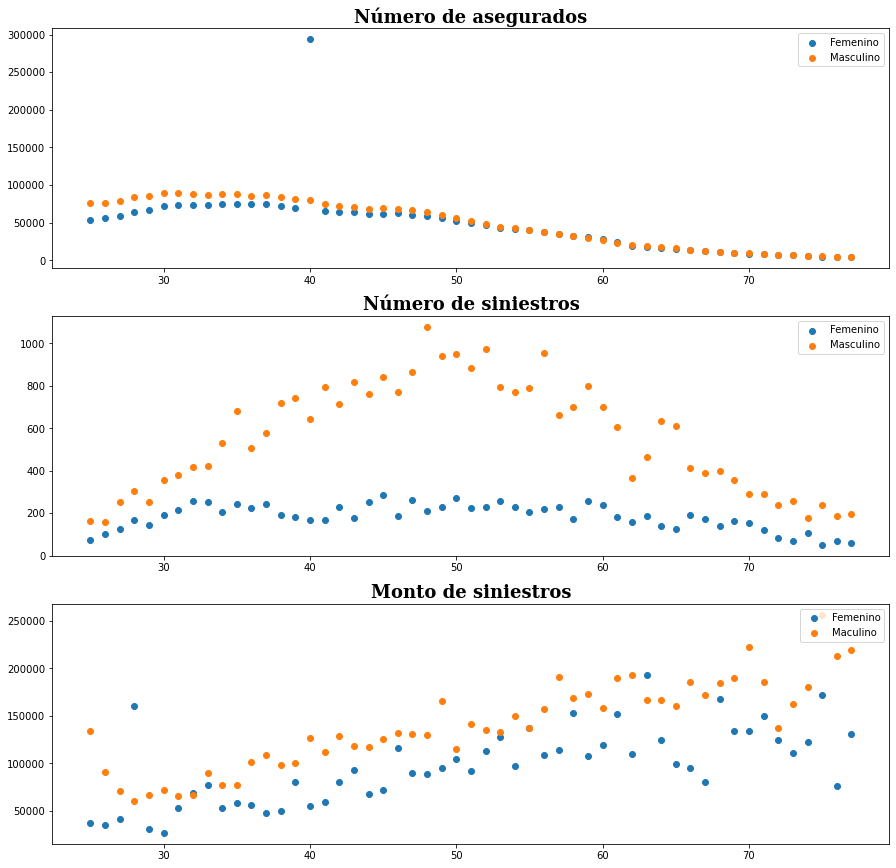

In [3]:
# graficas de los datos
x = datos['EDAD']
y_sf = datos['SINIESTROS_F']
y_mf = datos['MONTO_SIN_F']
y_nf = datos['SEGUROS_F']
y_sm = datos['SINIESTROS_M']
y_mm = datos['MONTO_SIN_M']
y_nm = datos['SEGUROS_M']
y_ff = datos['FRECUENCIA_F']
y_fm = datos['FRECUENCIA_M']

figure, axis = plt.subplots(3, 1, figsize=(15,15))

axis[0].scatter(x, y_nf)
axis[0].scatter(x, y_nm)
axis[0].set_title("Número de asegurados", fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18})
axis[0].legend(('Femenino', 'Masculino'),
prop = {'size': 10}, loc='upper right')

axis[1].scatter(x, y_sf)
axis[1].scatter(x, y_sm)
axis[1].set_title("Número de siniestros", fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18})
axis[1].legend(('Femenino', 'Masculino'),
prop = {'size': 10}, loc='upper right')


axis[2].scatter(x, y_mf)
axis[2].scatter(x, y_mm)
axis[2].set_title("Monto de siniestros", fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18})
axis[2].legend(('Femenino', 'Maculino'),
prop = {'size': 10}, loc='upper right')

plt.show

In [4]:
## Coeficiente número de asegurados
hombres_asegurados=sum(y_nm)/(sum(y_nf)+sum(y_nm))
mujeres_aseguradas=sum(y_nf)/(sum(y_nf)+sum(y_nm))
print("Proporción de hombres asegurados:","{0:.2f}%".format(hombres_asegurados*100))
print("Proporción de mujeres aseguradas:","{0:.2f}%".format(mujeres_aseguradas*100),end="\n\n")


## Coeficiente número de siniestros
hombres_siniestros=sum(y_sm)/(sum(y_sf)+sum(y_sm))
mujeres_siniestros=sum(y_sf)/(sum(y_sf)+sum(y_sm))
print("Proporción de hombres que presentaron siniestros:","{0:.2f}%".format(hombres_siniestros*100))
print("Proporción de mujeres que presentaron siniestros:","{0:.2f}%".format(mujeres_siniestros*100),end="\n\n")

## Coeficiente monto de siniestros
hombres_monto=sum(y_mm)/(sum(y_mf)+sum(y_mm))
mujeres_monto=sum(y_mf)/(sum(y_mf)+sum(y_mm))
print("Proporción del monto de siniestros presentado por hombres:","{0:.2f}%".format(hombres_monto*100))
print("Proporción del monto de siniestros presentado por mujeres:","{0:.2f}%".format(mujeres_monto*100),end="\n\n")

Proporción de hombres asegurados: 50.89%
Proporción de mujeres aseguradas: 49.11%

Proporción de hombres que presentaron siniestros: 75.46%
Proporción de mujeres que presentaron siniestros: 24.54%

Proporción del monto de siniestros presentado por hombres: 59.01%
Proporción del monto de siniestros presentado por mujeres: 40.99%



A partir de la información proporcionada, se propone un ajuste polinomial de grado 3 para aplicar a la frecuencia y severidad por género, valores necesarios para el cálculo de la prima de riesgo

Coeficientes ajuste frecuencia F: 
[-1.42312177e-07  2.73846870e-05 -1.36169035e-03  2.23164334e-02] 

Coeficientes ajuste monto F: 
[-2.65110190e+00  3.79959278e+02 -1.51179516e+04  2.37470130e+05] 

Coeficientes ajuste frecuencia M: 
[-3.58155284e-08  1.29198031e-05 -2.42677981e-04  5.32661038e-04] 

Coeficientes ajuste monto M: 
[-1.14497216e+00  1.75426079e+02 -5.80079217e+03  1.31077874e+05] 



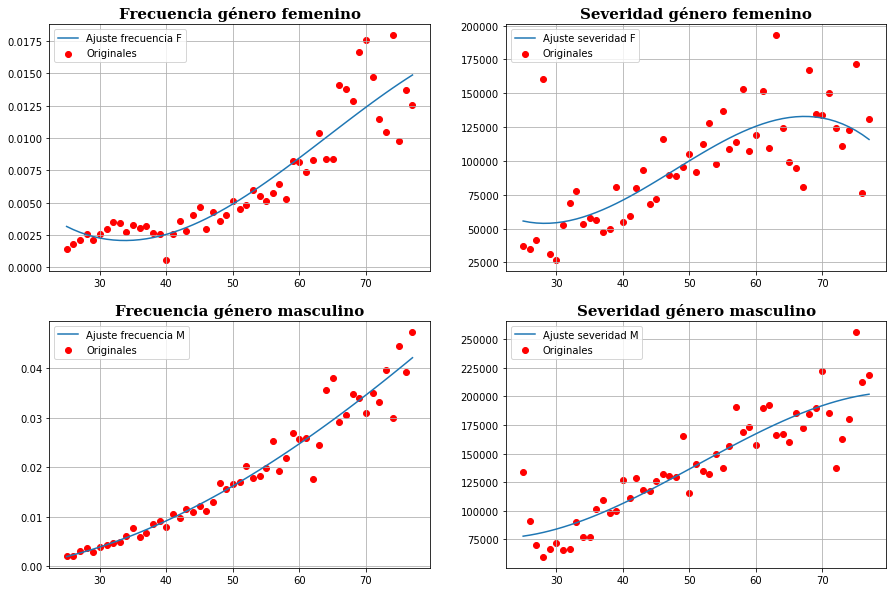

In [5]:
# se hace el ajuste polinomial

grado = 3

coef_reg_ff = np.polyfit(x,y_ff, grado)
frec_f = np.polyval(coef_reg_ff, x)
print("Coeficientes ajuste frecuencia F: ")
print(coef_reg_ff, "\n")

coef_reg_monf = np.polyfit(x,y_mf, grado)
mon_f = np.polyval(coef_reg_monf, x)
print("Coeficientes ajuste monto F: ")
print(coef_reg_monf, "\n")

coef_reg_fm = np.polyfit(x,y_fm, grado)
frec_m = np.polyval(coef_reg_fm, x)
print("Coeficientes ajuste frecuencia M: ")
print(coef_reg_fm, "\n")

coef_reg_monm = np.polyfit(x,y_mm, grado)
mon_m = np.polyval(coef_reg_monm, x)
print("Coeficientes ajuste monto M: ")
print(coef_reg_monm, "\n")

figure, axis = plt.subplots(2, 2, figsize=(15,10))

axis[0, 0].scatter(x, y_ff, label='Originales', c='r')
axis[0, 0].plot(x, frec_f, label = 'Ajuste frecuencia F')
axis[0, 0].grid()
axis[0, 0].legend()
axis[0, 0].set_title("Frecuencia género femenino",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 15})

axis[0, 1].scatter(x, y_mf, label='Originales', c='r')
axis[0, 1].plot(x, mon_f, label = 'Ajuste severidad F')
axis[0, 1].grid()
axis[0, 1].legend()
axis[0, 1].set_title("Severidad género femenino",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 15})

axis[1, 0].scatter(x, y_fm, label='Originales', c='r')
axis[1, 0].plot(x, frec_m, label = 'Ajuste frecuencia M')
axis[1, 0].grid()
axis[1, 0].legend()
axis[1, 0].set_title("Frecuencia género masculino",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 15})

axis[1, 1].scatter(x, y_mm, label='Originales', c='r')
axis[1, 1].plot(x, mon_m, label = 'Ajuste severidad M')
axis[1, 1].grid()
axis[1, 1].legend()
axis[1, 1].set_title("Severidad género masculino",fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 15})

plt.show()

De manera gráfica se observa que un ajuste de grado 3 es suficiente para ajustar los valores de la frecuencia y severidad de los siniestros causados por el virus del SARS-CoV2

In [6]:
# se calculan las medidas RMSE y R2 para conocer el ajuste del modelo propuesto
mse_ff = np.mean((x-y_ff)**2)
RMSE_ff =  np.sqrt(mse_ff)
R2_ff = 1 - np.sum((y_ff-frec_f)**2)/np.sum((y_ff-np.mean(y_ff))**2)
print("Medidas de ajuste frecuencia género femenino:")
print('RMSE: ', RMSE_ff)
print('R2: ', R2_ff, "\n")

mse_mf = np.mean((x-y_mf)**2)
RMSE_mf =  np.sqrt(mse_mf)
R2_mf = 1 - np.sum((y_mf-mon_f)**2)/np.sum((y_mf-np.mean(y_mf))**2)
print("Medidas de ajuste severidad género femenino:")
print('RMSE: ', RMSE_mf)
print('R2: ', R2_mf, "\n")

mse_fm = np.mean((x-y_fm)**2)
RMSE_fm =  np.sqrt(mse_fm)
R2_fm = 1 - np.sum((y_fm-frec_m)**2)/np.sum((y_fm-np.mean(y_fm))**2)
print("Medidas de ajuste frecuencia género masculino:")
print('RMSE: ', RMSE_fm)
print('R2: ', R2_fm, "\n")

mse_mm = np.mean((x-y_mm)**2)
RMSE_mm =  np.sqrt(mse_mm)
R2_mm = 1 - np.sum((y_mm-mon_m)**2)/np.sum((y_mm-np.mean(y_mm))**2)
print("Medidas de ajuste severidad género masculino:")
print('RMSE: ', RMSE_mm)
print('R2: ', R2_mm, "\n")


Medidas de ajuste frecuencia género femenino:
RMSE:  53.237312844356225
R2:  0.8462683724000227 

Medidas de ajuste severidad género femenino:
RMSE:  104693.07641134699
R2:  0.5620142950648132 

Medidas de ajuste frecuencia género masculino:
RMSE:  53.22332793278272
R2:  0.9455665976558596 

Medidas de ajuste severidad género masculino:
RMSE:  146905.07110953916
R2:  0.8102377832389855 



Adicionalmente, se calcularon los coeficientes RSME y R2 para corroborar el ajuste polinomial a los datos reales, donde se tiene que el nivel de ajuste es suficiente para calcular la prima de riesgo.

Como dato adicional, se obtuvo un factor de recargo o descuento dependiendo de la entidad del país donde reside el contratante, con esto, el costo de la prima puede aumentar o disminuir dependiendo de la siniestralidad en cada región, cabe señalar que este es un valor fijo que se multiplicará a la prima calculada con la frecuencia y severidad obtenida anteriormente.

In [7]:
# Factor por entidad federativa
entidad = pd.read_csv('FACTORES POR ESTADOS.csv').set_index("ENTIDAD")
print(entidad)

                     FACTOR F  FACTOR M
ENTIDAD                                
Aguascalientes       0.397851  0.618397
Baja California      1.499552  1.304771
Baja California Sur  1.648623  0.320319
Campeche             1.560309  0.931538
Chiapas              0.465112  0.284792
Chihuahua            0.800610  0.680334
Coahuila             1.083332  0.850521
Colima               0.219945  0.699909
Ciudad de México     1.185877  1.240368
Durango              0.364964  0.260841
Estado de México     0.895163  0.765424
Guanajuato           0.839853  1.171038
Guerrero             2.362877  1.839231
Hidalgo              0.521770  0.390903
Jalisco              0.882849  0.777883
Michoacán            1.800304  2.676808
Morelos              0.777051  0.431436
Nayarit              1.250128  0.359984
Nuevo León           0.669248  0.911617
Oaxaca               0.598981  0.240529
Puebla               1.129629  1.120969
Querétaro            0.531185  0.535899
Quintana Roo         1.216239  0.989182


Se crea una función para calcular la prima de riesgo, donde se debe de ingresar la edad del contratante, el sexo y la entidad federativa donde reside, de esta manera se va a tener el valor de la prima de riesgo que se deberá cobrar al asegurado al contratar el seguro.

In [8]:
# Función cálculo de prima con frecuencias
def priesgo(edad, sexo, estado):
    if sexo == "F" and estado in (entidad.index) and edad>24 and edad<78:
        p = np.polyval(coef_reg_ff, edad) * np.polyval(coef_reg_monf, edad) * entidad["FACTOR F"][estado]
    elif sexo == "M" and estado in (entidad.index) and edad>24 and edad<78:
        p = np.polyval(coef_reg_fm, edad) * np.polyval(coef_reg_monm, edad) * entidad["FACTOR M"][estado]
    else:
        p = 0
    return p

def prima(edad, sexo, estado):
    p = priesgo(edad, sexo, estado)
    if sexo == "F" and estado in (entidad.index):
        s = "femenino"
        print("La prima de riesgo para una persona de edad " + str(edad) 
              + ", sexo " + str(s) + " de " + estado + 
              " es de: $" + str(round(p,2)))
    elif sexo == "M" and estado in (entidad.index):
        s = "masculino"
        print("La prima de riesgo para una persona de edad " + str(edad) 
              + ", sexo " + str(s) + " de " + estado + 
              " es de: $" + str(round(p,2)))
    else:
        print("Datos incorrectos")

In [9]:
prima(31, "M", "Ciudad de México")

La prima de riesgo para una persona de edad 31, sexo masculino de Ciudad de México es de: $463.47


In [10]:
# carga de datos
emision = pd.read_csv('EMISION.csv')

edades=emision["EDAD_CALC"]
sexo=emision["SEXO"]
ent=emision["DESCRIPCION_ENTIDAD_FEDERATIVA"]
asegurados=emision["ASEGURADOS"]

t = 0
for n in range(0,len(edades)):
    t += priesgo(int(edades[n]), sexo[n], ent[n])*int(asegurados[n])

print(f'El valor esperado de siniestros por Covid-19 del total de compañías en México es : {t:,.2f}')

El valor esperado de siniestros por Covid-19 del total de compañías en México es : 5,118,278,747.54


- **Conclusiones**

Con la información analizada se pudo calcular una prima de riesgo a nivel mercado para cubrir el riesgo de enfermar del virus SARS-CoV2, además el costo de la prima se pudo desglosar por sexo y lugar de residencia, lo cual dará un resultado más preciso para la reserva que deben crear las aseguradoras por este tipo de evento.

Cabe señalar que al llevar a cabo un ajuste polinomial a los datos se evita tomar los siniestros atípicos que de calcular la prima de manera discreta, podrían provocar un desajuste en la prima, por lo que al utilizar un polinomio para obtener los datos necesarios para el cálculo, se tiene un valor más homogéneo que podría utilizar cualquier institución para vender este tipo de seguros.


- **Referencias bibliográficas**


- Información estadística CNSF
- https://espanol.cdc.gov/flu/symptoms/flu-vs-covid19.htm
- http://www.cnsf.gob.mx/Difusion/OtrasPublicaciones/DOCUMENTOS%20DE%20TRABAJO%20DESCRIPTIVOS/11.-Aspectos%20T%C3%A9cnicos%20para%20la%20Determinaci%C3%B3n%20de%20la%20Prima%20de%20Riesgo%20en%20el%20Seguro%20de%20Gastos%20M%C3%A9dicos%20Mayores.pdf
- https://www.pwc.com/co/es/nuestros-servicios/consultoria/riesgos-actuaria/industria-aseguradora-en-el-contexto-de-covid-19.html
- http://www.cnsf.gob.mx/Eventos/Seminarios/EDUARDO%20GARDUNO_RIESGOS%20PAND%C3%89MICOS.pdf
